# Plotting pandas dataframe with seaborn -contd.

In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Title - Plotting pandas dataframe with seaborn (contd.)

Created on Thu Aug 29 07:12:48 2019
@author: k as root
"""

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

## 1. matplotlib

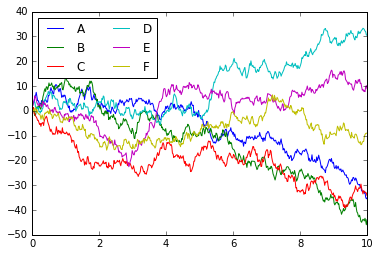

In [3]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# 2. seaborn (better statistical plots)

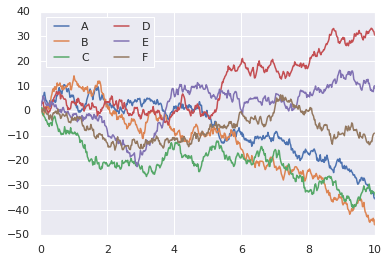

In [4]:
import seaborn as sns
sns.set()

# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [24]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

## Histogram, kde and densities

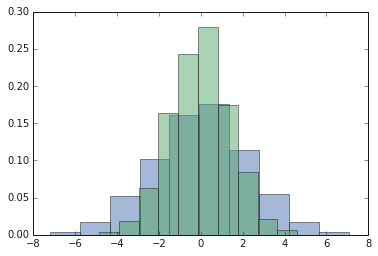

In [25]:
# Histogram
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

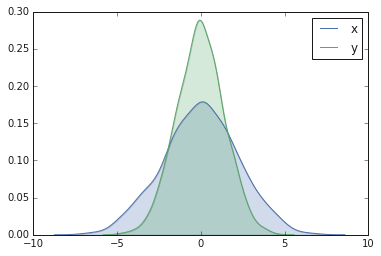

In [27]:
# kde
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

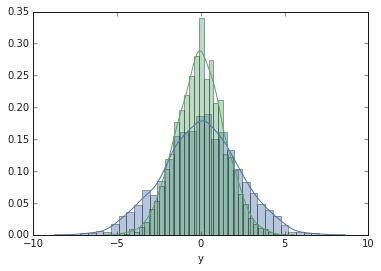

In [28]:
## Histogram + kde
sns.distplot(data['x'])
sns.distplot(data['y']);

/root/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


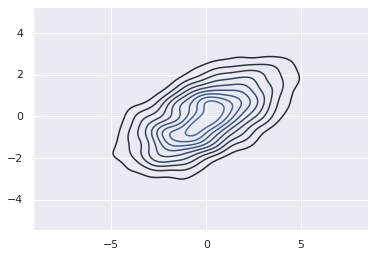

In [8]:
##
sns.kdeplot(data);

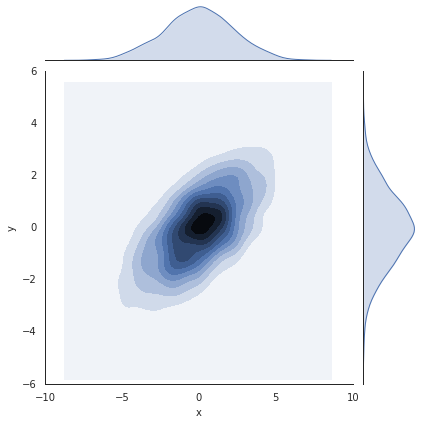

In [29]:
## joint distribution and the marginal distributions together using sns.jointplot
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

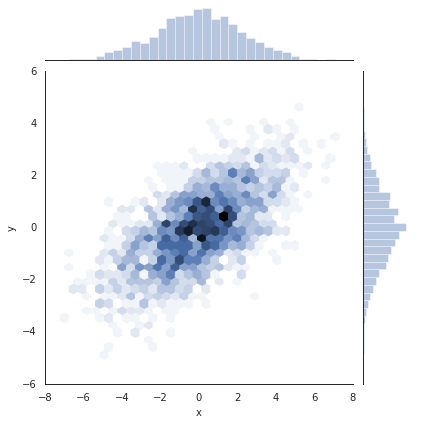

In [30]:
## other parameters that can be passed to jointplot—for example, we can use a hexagonally based histogram
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

In [11]:
### Pair Plots
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


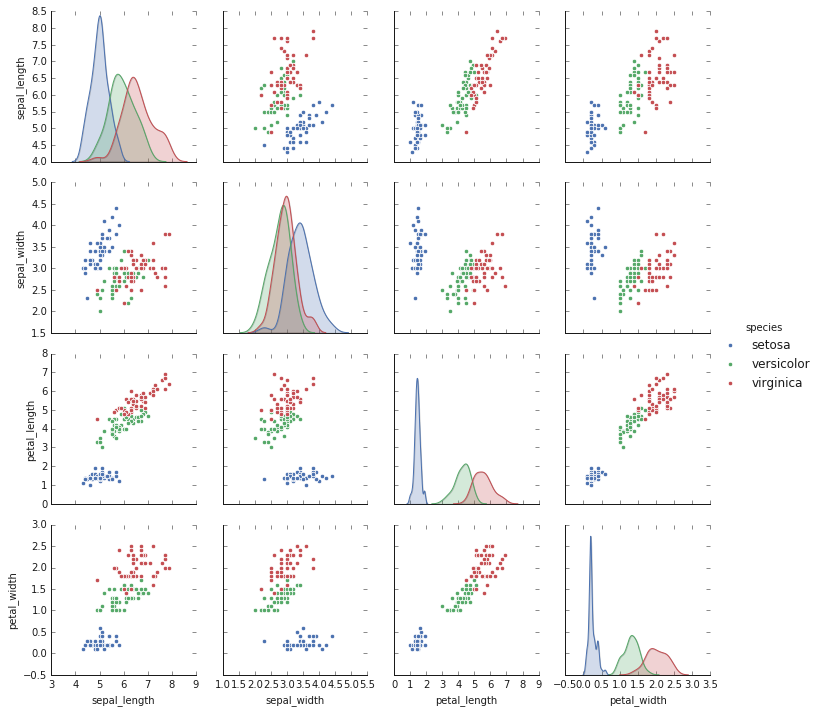

In [31]:
# Visualizing the multidimensional relationships
# Pair plot
sns.pairplot(iris, hue='species', height=2.5);

In [13]:
### Faceted histograms: histograms of subsets
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


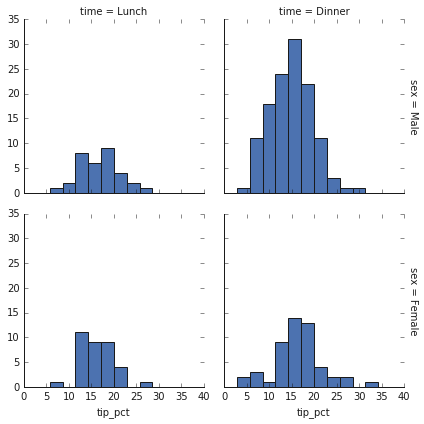

In [32]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

/root/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


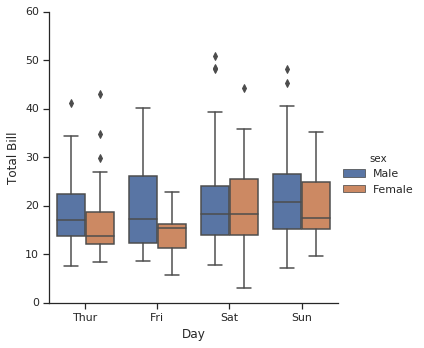

In [15]:
### Factor plots: Factor plots can be useful for this kind of visualization as well. 
#This allows you to view the distribution of a parameter within bins defined by any other parameter
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

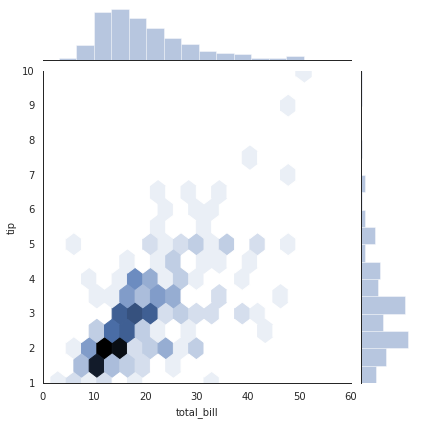

In [34]:
##Joint distributions
#Similar to the pairplot we saw earlier, we can use sns.jointplot to show the 
#joint distribution between different datasets, along with the associated marginal distributions
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

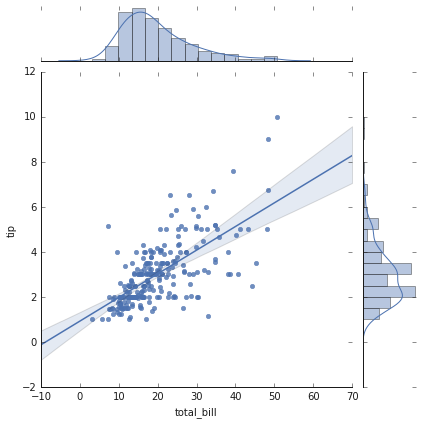

In [35]:
#The joint plot can even do some automatic kernel density estimation and regression:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

In [40]:
### Bar plots
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


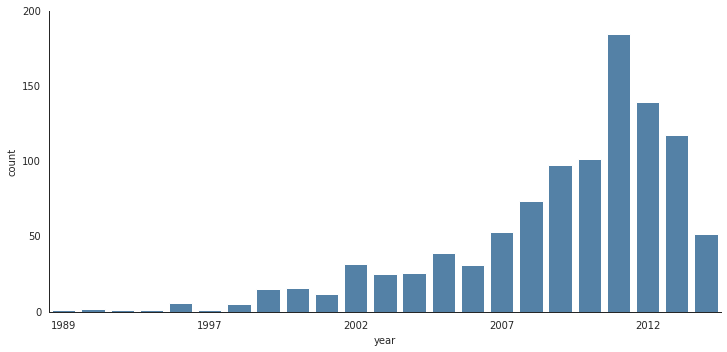

In [42]:
###Time series can be plotted using sns.factorplot
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

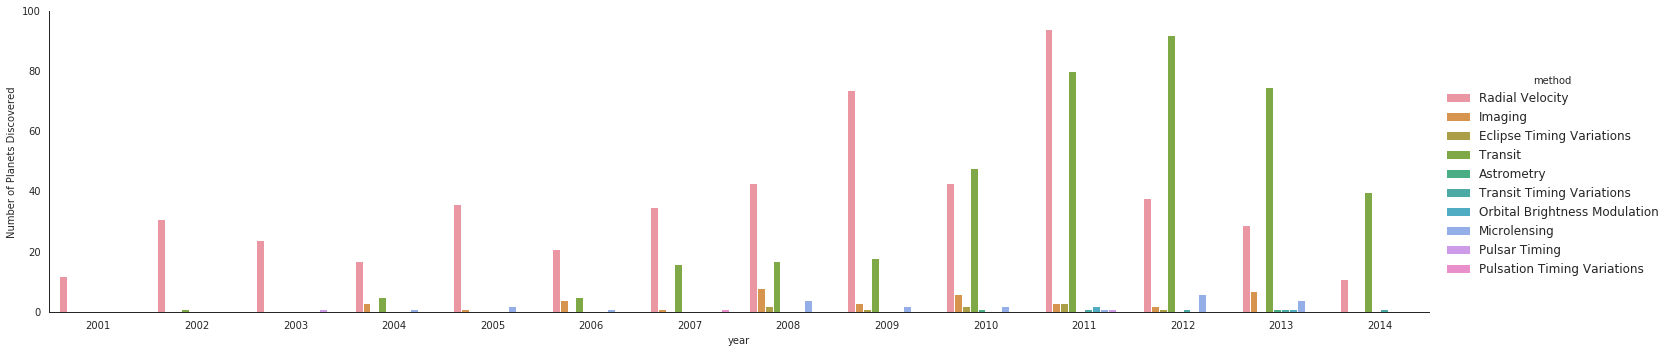

In [43]:
#We can learn more by looking at the method of discovery of each of these planets:
##
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')